## Цель практической работы

Закрепить на практике знания о процедуре обучения решающего дерева.


## Что входит в практическую работу

*  Загрузка датасета.
*  Поиск оптимального порога для выбранного признака в корне дерева.
*  Поиск оптимальной пары (признак, порог) в корне дерева.
*  Визуальный анализ первого разбиения.

## Что нужно сделать
Постройте первое разбиение объектов на две части в решающем дереве самостоятельно, без использования готовых моделей из библиотек Python (исходя из максимизации Information Gain или минимизации аналогичной функции).

Эту практическую работу не нужно сдавать на проверку. Выполните все задания и сверьтесь с ответами ниже.

В этом задании вы будете решать задачу регрессии (ведь решающее дерево можно применять и в задачах классификации) — предсказывать стоимость домов по их характеристикам.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import numpy as np

from sklearn.datasets import fetch_california_housing

In [2]:
housing = fetch_california_housing(as_frame=True)

In [3]:
X = housing['data']
y = housing['target']

print(f"Data shape: {X.shape}")
X.head()

Data shape: (20640, 8)


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [4]:
y.head()

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: MedHouseVal, dtype: float64

$R_m$ — множество объектов в разбиваемой вершине, $j$ — номер признака, по которому происходит разбиение, $t$ — порог разбиения.

Можно вычислять Information Gain, а можно считать ошибку:

$$ Q(R_m, j, t) = \frac{|R_\ell|}{|R_m|}H(R_\ell) + \frac{|R_r|}{|R_m|}H(R_r) \to \min_{j, t} $$
$R_\ell$ — множество объектов в левом поддереве, $R_r$ — множество объектов в правом поддереве.

$H(R)$ — критерий информативности, с помощью которого можно оценить качество распределения целевой переменной среди объектов множества $R$.

Реализуйте подсчёт критерия ошибки. Для этого реализуйте функции для подсчёта значения критерия информативности, а также для разбиения вершины.

In [32]:
X.iloc[10:20].iloc[5:]
X_train["target"].var()
X_train.sort_values(X_train.columns[2], inplace=True)
X_train

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
5916,2.8750,46.0,0.846154,0.846154,24.0,1.846154,34.28,-118.44,1.625
3126,2.3750,4.0,1.000000,1.000000,6.0,3.000000,35.21,-117.79,1.375
17820,1.0938,20.0,1.130435,1.043478,120.0,1.739130,37.37,-121.90,1.875
14818,1.9107,36.0,1.130435,0.608696,58.0,2.521739,32.68,-117.11,1.250
4552,1.0769,52.0,1.260870,1.163043,171.0,1.858696,34.04,-118.24,1.125
...,...,...,...,...,...,...,...,...,...
1912,4.9750,16.0,56.269231,10.153846,54.0,2.076923,39.01,-120.16,2.063
11862,2.6250,25.0,59.875000,15.312500,28.0,1.750000,40.27,-121.25,0.675
1913,4.0714,19.0,61.812500,11.000000,112.0,2.333333,39.01,-120.06,4.375
12447,1.6154,17.0,62.422222,14.111111,83.0,1.844444,33.97,-114.49,0.875


In [43]:
def h_function(target_series):
    return target_series.var()

def q_function(r, j, t):
    target = 'target'
    r_m = r.shape[0]
#     r.sort_values(r.columns[j], inplace=True)  # лучше конечно сортировку вынести за цикл 
    left = r.iloc[:t]
    r_l = left.shape[0]
    right = r.iloc[t:]
    r_r = right.shape[0]
    return r_l/r_m*h_function(left[target]) + r_r/r_m*h_function(right[target])
    

Разбейте данные на тренировочную и тестовую части. В тестовую часть отправьте четверть всех данных. Зафиксируйте random_state при разбиении.

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=111)

Чтобы было удобно сортировать объекты вместе с целевой переменной, 
допишем target в таблицу X_train.

In [6]:
X_train["target"] = y_train

Возьмём для примера признак AveRooms и подберём для него оптимальный порог.

Для удобства перебора порога отсортируем по этому признаку таблицу.

In [7]:
X_train.sort_values("AveRooms", inplace=True)

In [8]:
X_train.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
5916,2.8750,46.0,0.846154,0.846154,24.0,1.846154,34.28,-118.44,1.625
3126,2.3750,4.0,1.000000,1.000000,6.0,3.000000,35.21,-117.79,1.375
17820,1.0938,20.0,1.130435,1.043478,120.0,1.739130,37.37,-121.90,1.875
14818,1.9107,36.0,1.130435,0.608696,58.0,2.521739,32.68,-117.11,1.250
4552,1.0769,52.0,1.260870,1.163043,171.0,1.858696,34.04,-118.24,1.125


Переберите в цикле все возможные пороги для разбиения тренировочных данных по признаку AveRooms.

Для каждого разбиения необходимо вычислить ошибку Q: сначала для правого и левого поддеревьев вычисляем критерий информативности (дисперсию таргета), затем складываем полученные значения с весами.

In [34]:
Qs = [] # список ошибок для каждого порога

for i in range(X_train.shape[0]):
    qual = q_function(X_train, 2, i) # вычислите Q
    Qs.append(qual)

Нарисуйте график зависимости Q от порога.

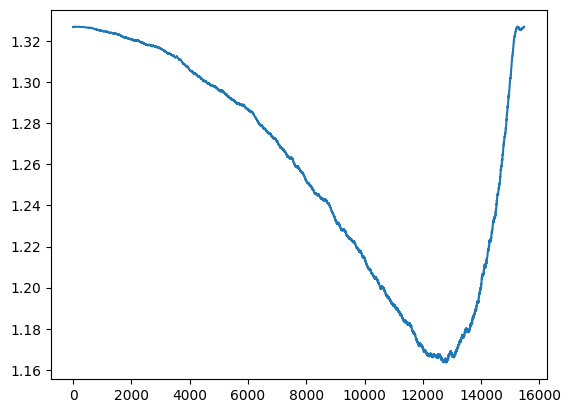

In [35]:
# ваш код здесь
plt.plot(Qs)

Чем меньше Q, тем лучше. 

При каком приблизительно значении порога достигается минимум Q?

In [42]:
np.min(Qs[2:-1])

1.1635579031855587

Теперь повторите процедуру вычисления Q для каждого признака.

Чтобы было удобно сравнивать значение Q для разных признаков, отобразите все графики на одном рисунке.

Комментарий: множество значений у каждого признака своё, поэтому будем откладывать по оси x просто числа от 0 до длины выборки. Величину оптимального порога по графику будет определить невозможно, зато вы сможете определить оптимальный признак для разбиения.

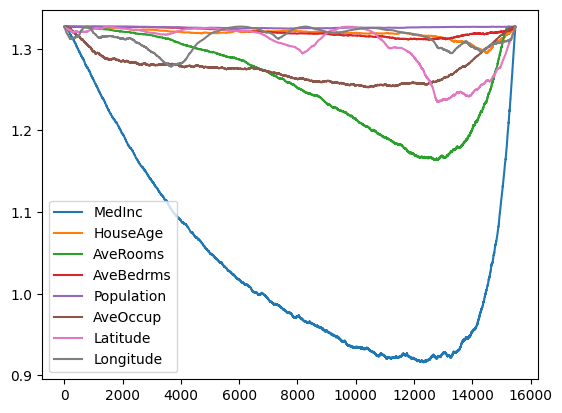

In [53]:
q_dic = {}
for feat in X_train.columns[:-1]:
    Qs = [] # список ошибок для каждого порога
    X_train.sort_values(feat, inplace=True)

    for i in range(X_train.shape[0]):
        qual = q_function(X_train, 2, i) # вычислите Q
        Qs.append(qual)
    
    plt.plot(Qs, label=feat)
    q_dic[feat] = Qs
    
plt.legend()

# ваш код для отрисовки графиков здесь

Для разбиения по какому признаку достигается наименьшее значение критерия Q?

Нарисуйте для него график отдельно (уже с его осью значений порога).

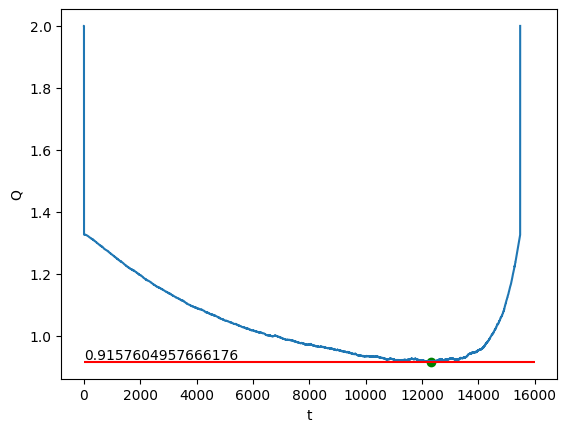

In [95]:
# ваш код здесь
Qs = q_dic['MedInc']
plt.plot(Qs)
plt.scatter(np.argmin(Qs[2:-1]), np.min(Qs[2:-1]), color='green')
plt.hlines(np.min(Qs[2:-1]), 0, 16_000, color='red')
plt.text(0, np.min(Qs[2:-1]) + 0.01, np.min(Qs[2:-1]))
plt.ylabel('Q')
plt.xlabel('t')
plt.show()

Вычислите оптимальное значение порога.

In [100]:
# ваш код здесь
X_train.sort_values("MedInc", inplace=True)
Qs = [] # список ошибок для каждого порога

for i in range(X_train.shape[0]):
    qual = q_function(X_train, 2, i) # вычислите Q
    Qs.append(qual)
    
Qs[0], Qs[1], Qs[-1] = 2, 2, 2
t = np.argmin(Qs)
v_b = X_train['MedInc'].iloc[t]
v_b

5.0858

Нарисуйте выборку в осях найденного признака и таргета и отобразите на графике порог, по которому выполняется разбиение.

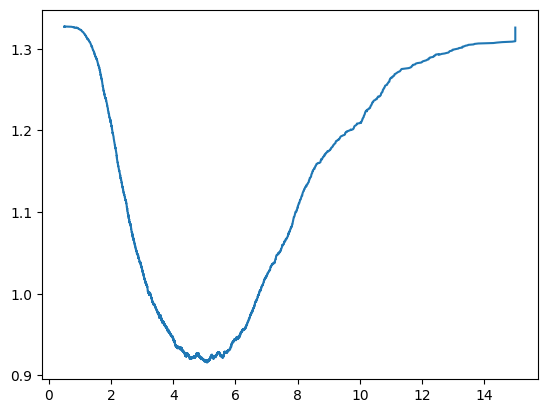

In [72]:
# ваш код здесь

plt.plot(X_train['MedInc'], Qs)
plt.show()

Text(0.5, 0, 'MedInc')

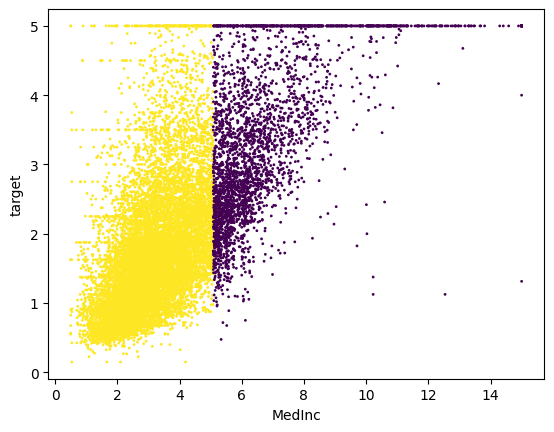

In [103]:
plt.scatter(X_train['MedInc'], X_train['target'], s = 1, c=(X_train['MedInc'] < v_b))
plt.ylabel('target')
plt.xlabel('MedInc')


Какой вывод можно сделать из визуального анализа последнего графика?

Полученное разбиение дает различные средние значения: слева - меньшие значения, справа - большие.

|

|

|

|

|

|

|

|

|

|

|

# Проверьте своё решение

Разбейте данные на тренировочную и тестовую части. В тестовую часть отправьте четверть всех данных. Зафиксируйте random_state при разбиении.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=111)

Чтобы было удобно сортировать объекты вместе с целевой переменной, 
допишем target в таблицу X_train.

In [ ]:
X_train["target"] = y_train

Возьмём для примера признак AveRooms и подберём для него оптимальный порог.

Для удобства перебора порога отсортируем по этому признаку таблицу.

In [ ]:
X_train.sort_values("AveRooms", inplace=True)

In [ ]:
X_train.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
5916,2.8750,46.0,0.846154,0.846154,24.0,1.846154,34.28,-118.44,1.625
3126,2.3750,4.0,1.000000,1.000000,6.0,3.000000,35.21,-117.79,1.375
17820,1.0938,20.0,1.130435,1.043478,120.0,1.739130,37.37,-121.90,1.875
14818,1.9107,36.0,1.130435,0.608696,58.0,2.521739,32.68,-117.11,1.250
4552,1.0769,52.0,1.260870,1.163043,171.0,1.858696,34.04,-118.24,1.125


Переберите в цикле все возможные пороги для разбиения тренировочных данных по признаку AveRooms.

Для каждого разбиения необходимо вычислить ошибку Q: сначала для правого и левого поддеревьев вычисляем критерий информативности (дисперсию таргета), затем складываем полученные значения с весами.

In [ ]:
Qs = [] # список ошибок для каждого порога

for i in range(X_train.shape[0]):
    qual = X_train["target"][:i].std()**2 * i/X_train.shape[0] + \
    X_train["target"][i:].std()**2 * (1-i/X_train.shape[0])
    Qs.append(qual)

Нарисуйте график зависимости Q от порога.

Text(0, 0.5, 'Q')

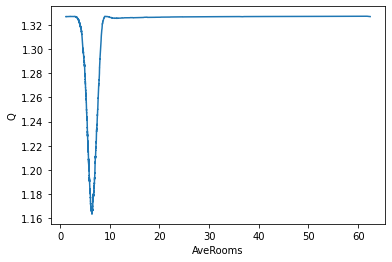

In [ ]:
plt.plot(X_train["AveRooms"], Qs)
plt.xlabel("AveRooms")
plt.ylabel("Q")

Чем меньше Q, тем лучше. 

При каком приблизительно значении порога достигается минимум Q?

Теперь повторите процедуру вычисления Q для каждого признака.

Чтобы было удобно сравнивать значение Q для разных признаков, отобразите все графики на одном рисунке.

Комментарий: множество значений у каждого признака своё, поэтому будем откладывать по оси x просто числа от 0 до длины выборки. Величину оптимального порога по графику будет определить невозможно, зато вы сможете определить оптимальный признак для разбиения.

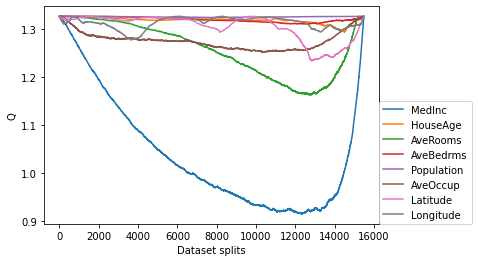

In [ ]:
for feat in X_train.columns[:-1]:
    Qs = []
    X_train.sort_values(feat, inplace=True)
    for i in range(X_train.shape[0]):
        qual = X_train["target"][:i].std()**2 * i/X_train.shape[0] + X_train["target"][i:].std()**2 * (1-i/X_train.shape[0])
        Qs.append(qual)
    plt.plot(Qs, label=feat)
plt.xlabel("Dataset splits")
plt.ylabel("Q")
plt.legend(loc=(1, 0))

Для разбиения по какому признаку достигается наименьшее значение критерия Q?

Нарисуйте для него график отдельно (уже с его осью значений порога).

Text(0, 0.5, 'Q')

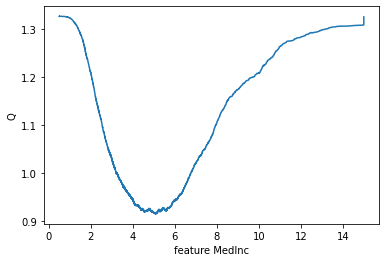

In [ ]:
ftr = "MedInc"
Qs = []
X_train.sort_values(ftr, inplace=True)
for i in range(X_train.shape[0]):
    qual = X_train["target"][:i].std()**2 * i/X_train.shape[0] + \
    X_train["target"][i:].std()**2 * (1-i/X_train.shape[0])
    Qs.append(qual)
plt.plot(X_train[ftr], Qs)
plt.xlabel("feature "+ftr)
plt.ylabel("Q")

Вычислите оптимальное значение порога.

In [ ]:
mask = np.logical_not(np.isnan(Qs))
Qs = np.array(Qs)[mask]
threshs = X_train[ftr].values[mask]

threshs[np.argmin(Qs)]

5.0858

Нарисуйте выборку в осях найденного признака и таргета и отобразите на графике порог, по которому выполняется разбиение.

Text(0, 0.5, 'Target')

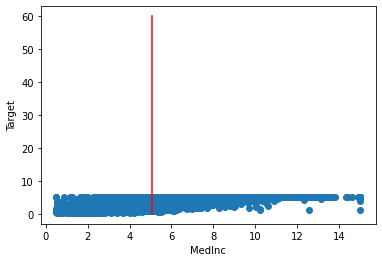

In [ ]:
plt.scatter(X_train["MedInc"], X_train["target"])
plt.plot([thresh, thresh], [0, 60], color="red")
plt.xlabel("MedInc")
plt.ylabel("Target")

Из визуального анализа последнего графика понятно, что большинство значений таргета слева от разбивающей прямой меньше, чем большинство значений таргета справа от разбивающей прямой. То есть разбиение разумно делит объекты.